In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [15]:
class BrokenLines:
    def __init__(self, f, a, b, n_iters = 100, eps=1e-3, precision=10000):
        self.n_iters = n_iters
        self.f = f
        self.a = a
        self.b = b
        self.eps = eps
        self.precision = precision
        self.u0= a
        self.u1 = b
        self.u_mins = []
        self.L = self.__calc_Lipschitz() * 1.5
        

    def __calc_Lipschitz(self, m=int(1e3)): # Уклон хорд 
        L = -1
        increase = (self.b - self.a) / (m + 1)
        
        for i in range(1, m + 1):
            u_next = self.a + increase * i
            u_prev = self.a + increase * (i-1)
            L = max(L, abs(self.f(u_next) - self.f(u_prev)) / (u_next - u_prev))
        
        return L
    
    def __g(self, u, u0):
        return self.f(u0) - self.L * abs(u - u0)
    
    def __min_u(self, bl):
        dots = np.linspace(self.a, self.b, self.precision)
        min_index = np.argmin(bl) 
              
        return dots[min_index], min_index

    
    def __max_bl(self, func=None): # max{g(u,u0), g(u, u1)}
        g0s = [self.__g(i, self.u0) for i in np.linspace(self.a, self.b, self.precision)]
        
        if func is None:
            func = [self.__g(i, self.u1) for i in np.linspace(self.a, self.b, self.precision)]
        
        return np.maximum(g0s, func)
    

    def optimize(self):
        cur_iter = 0
        
        self.u0 = self.a
        self.u1 = self.b
        
        self.bl = self.__max_bl()
        u2, index = self.__min_u(self.bl)
        self.u_mins.append(u2)
        
        while (abs(self.f(u2) - self.bl[index] > self.eps) and (cur_iter < self.n_iters)):
            self.u0 = u2
            self.bl = self.__max_bl(func=self.bl)
            u2, index = self.__min_u(self.bl)
            self.u_mins.append(u2)
            cur_iter += 1
         
        print(f' min dot = {self.u_mins[-1]}, f(min dot) = {self.f(self.u_mins[-1])}')
        print(f'iter = {cur_iter}')
        return self.bl

In [16]:
def function(x):
    return np.log(4.5732*x) - 5.1540*x + 1.5

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi *x))  + np.exp(1) + 20

In [17]:
%%time
bl_method = BrokenLines(f=function, a=2, b=7, n_iters = 10000)
dots = bl_method.optimize()

 min dot = 7.0, f(min dot) = -31.111876672259015
iter = 10
Wall time: 486 ms


Text(0.5, 1.0, 'np.log(4.5732*x) - 5.1540*x + 1.5')

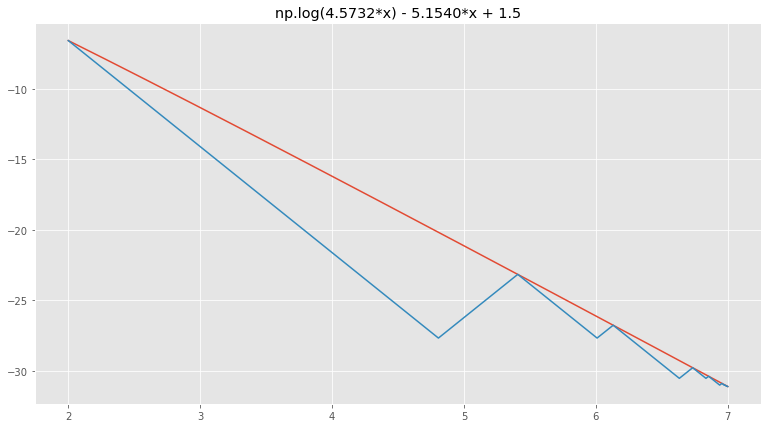

In [18]:
plt.figure(figsize=(13,7))
plt.plot(np.linspace(2, 7, len(dots)), function(np.linspace(2, 7, len(dots))))
plt.plot(np.linspace(2, 7, len(dots)), dots)
plt.title('np.log(4.5732*x) - 5.1540*x + 1.5')

In [19]:
%%time
bl_test = BrokenLines(f=ackley, a=-5, b=5, n_iters = 10000)
dots = bl_test.optimize()

 min dot = -0.0005000500050007517, f(min dot) = 1.0709789316100107
iter = 31
Wall time: 4.14 s


Text(0.5, 1.0, '-20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi *x))  + np.exp(1) + 20')

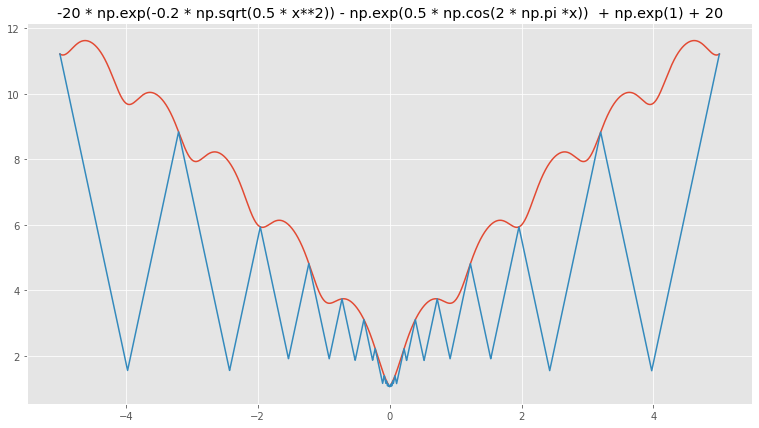

In [20]:
plt.figure(figsize=(13,7))
plt.plot(np.linspace(-5, 5, len(dots)), ackley(np.linspace(-5, 5, len(dots))))
plt.plot(np.linspace(-5, 5, len(dots)), dots)
plt.title('-20 * np.exp(-0.2 * np.sqrt(0.5 * x**2)) - np.exp(0.5 * np.cos(2 * np.pi *x))  + np.exp(1) + 20')